#OpenAI GTP-2
Copyright 2020-2023, Denis Rothman MIT License. Denis Rothman created the Colab notebook using the OpenAI repository, adding title steps for educational purposes only.

IMPORTANT NOTE, March 2023 Update: GPT-2 has conversational chatbot functionality. This notebook was designed to illustrate text generation with GPT-2. However, Google Colab does not support Tensforflow 1x anymore.

There are two solutions:

1. Solution 1 March 2023:**Run this March 2023 version of the notebook which now works thanks to Hnky**. [Hnky,hnky92](https://github.com/hnky92) was kind enough to find the problem and solve it!
Please go to his repository and give some stars to his work. Thank you Hnky!

or (and)

2. Solution 2: Running a new 2023 notebook in the BONUS directory of this repository: [GPT-2 & ChatGPT-the Origins.ipynb](https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/blob/main/Bonus/GPT_2_and_ChatGPT_the_Origins.ipynb)

This new notebook contains:

- a guide to understanding the source code of GPT-2 

- a Hugging Face implementation of text generation with GPT-2

- text generation with OpenAI davinci-instruct series(GPT-3)  which OpenAI ChatGPT was derived from. You will be able to run an example of a dialogue and compare the output  of the davinci-instruct-beta engine with the output of ChatGPT

- next steps to fine-tune your own chatbot 



---


It is important to note that we are running a low-level GPT-2 model 
and not a one-line call to obtain a result. We are also
avoiding pre-packaged versions. We are getting our hands dirty to
understand the architecture of a GPT-2 from scratch. You might get
some deprecation messages. However, the effort is worthwhile.

***Code Reference***
[Reference: OpenAI Repository](https://github.com/openai/gpt-2)

***Model Reference***
[Alec Radford, Jeffrey Wu, Rewon Child, David Luan, Dario Amodei, Ilya Sutskever,2019,'Language Models are Unsupervised Multitask Learners'](https://d4mucfpksywv.cloudfront.net/better-language-models/language-models.pdf)


Step 1: Pre-requisite: activate GPU in the notebook settings runTime menu



In [1]:
from IPython.display import Image     #This is used for rendering images in the notebook

##Step 1: Activating the GPU

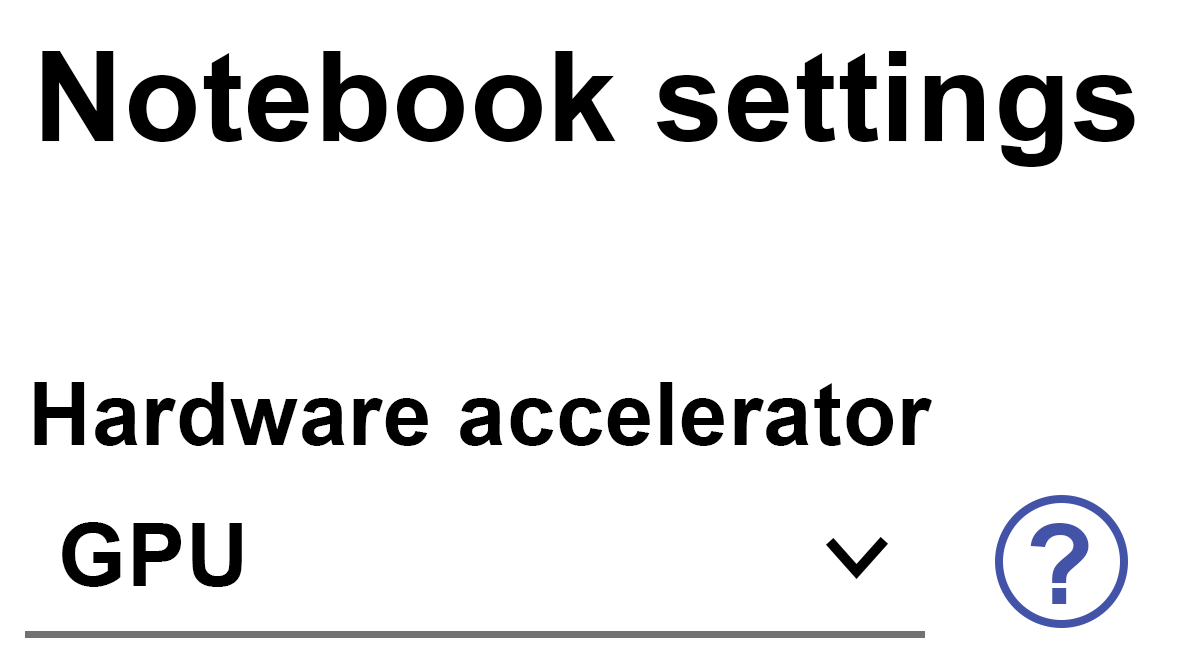

In [2]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_01.PNG', width=300) #This is used for rendering images in the notebook

#Step 2: Cloning the OpenAI GPT-2 repository

In [3]:
#@title Step 2: Cloning the OpenAI GPT-2 Repository 
#!git clone https://github.com/openai/gpt-2.git March 2023 update,changed to:
!git clone https://github.com/nshepperd/gpt-2

Cloning into 'gpt-2'...
remote: Enumerating objects: 429, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 429 (delta 20), reused 76 (delta 10), pack-reused 291
Receiving objects: 100% (429/429), 4.47 MiB | 10.04 MiB/s, done.
Resolving deltas: 100% (216/216), done.


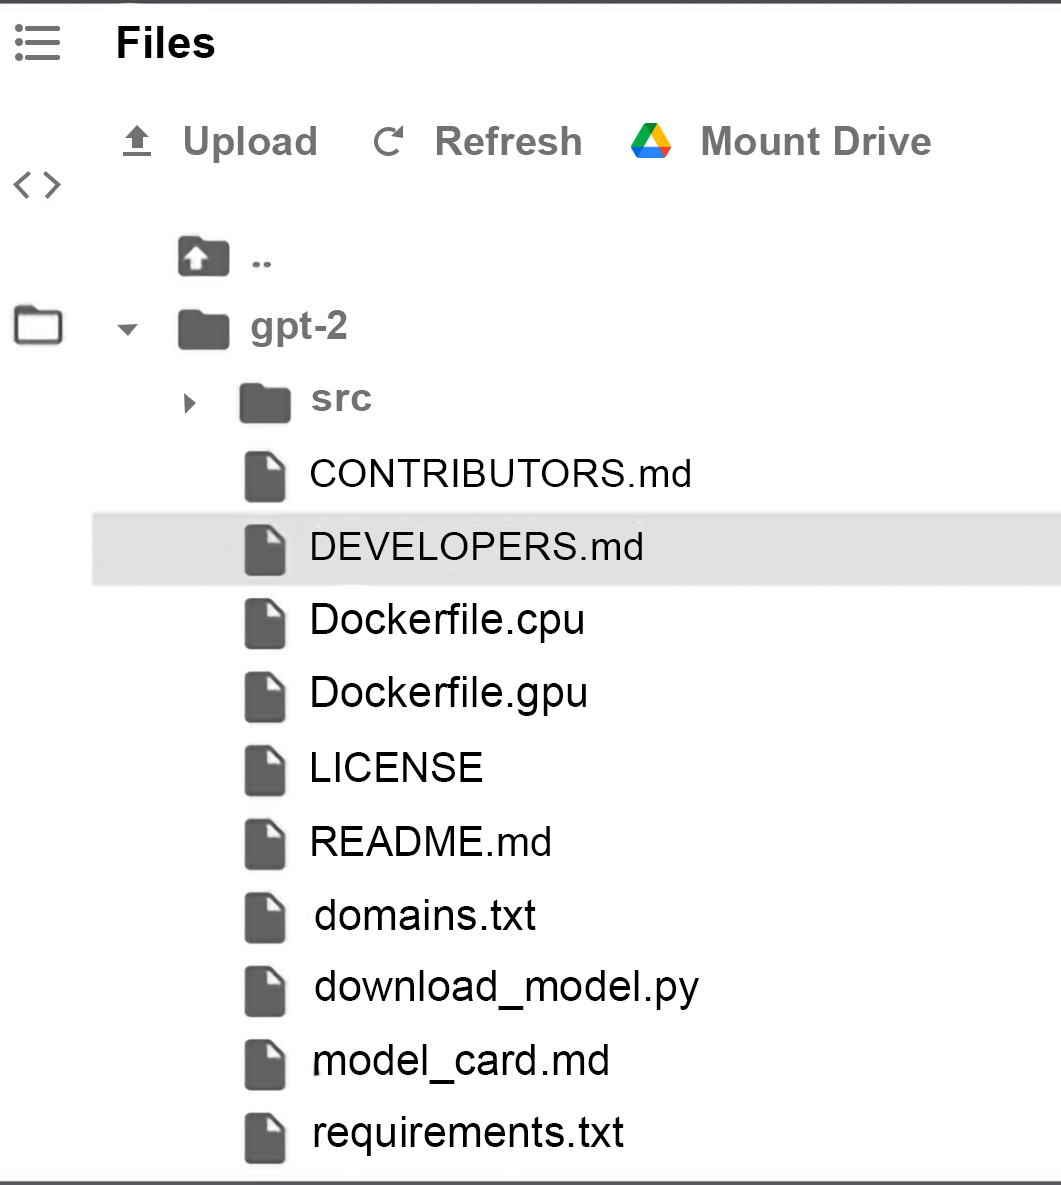

In [4]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_02.PNG', width=400) #This is used for rendering images in the notebook

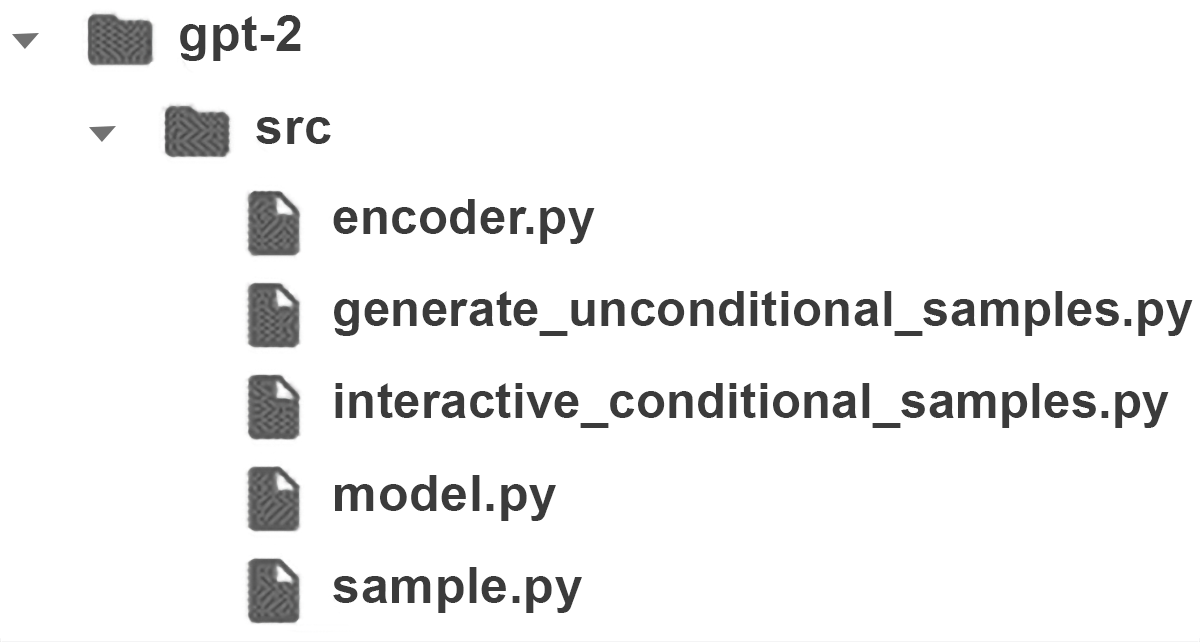

In [5]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_03.PNG', width=500) #This is used for rendering images in the notebook

#Step 3: Installing the requirements

In [6]:
#@title Step 3: Installing the requirements
import os                     # when the VM restarts import os necessary
os.chdir("/content/gpt-2")    
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 KB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.6/601.6 KB 38.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 18.0 MB/s eta 0:00:00
  Created wheel for regex: filename=regex-2017.4.5-cp39-cp39-linux_x86_64.whl size=677641 sha256=44077a4aa12776f949501f923032a89d390c3d4f74ab9ec95b7fbe9f7048a1c3
  Stored in directory: /root/.cache/pip/wheels/d4/70/3e/734b51125cb2502e07f14b79b8aa2f06ade3dc

#Step 4: Checking the version of TensorFlow

In [7]:
#@title Step 4 Checking the Version of TensorFlow 
#Colab has tf 1.x and tf 2.x installed
#Restart runtime using 'Runtime' -> 'Restart runtime...'
#%tensorflow_version 1.x March 2023 update
import tensorflow as tf
print(tf.__version__)

2.11.0


#Step 5: Downloading the 345M-parameter GPT-2 model

In [8]:
#@title Step 5: Downloading the 345M parameter GPT-2 Model
# run code and send argument
import os # after runtime is restarted
os.chdir("/content/gpt-2")
!python3 download_model.py '345M' 

Fetching checkpoint: 1.00kit [00:00, 867kit/s]                                                      
Fetching encoder.json: 1.04Mit [00:01, 937kit/s]                                                    
Fetching hparams.json: 1.00kit [00:00, 937kit/s]                                                    
Fetching model.ckpt.data-00000-of-00001: 1.42Git [01:57, 12.0Mit/s]                                 
Fetching model.ckpt.index: 11.0kit [00:00, 8.95Mit/s]                                               
Fetching model.ckpt.meta: 927kit [00:00, 936kit/s]                                                  
Fetching vocab.bpe: 457kit [00:00, 629kit/s]                                                        


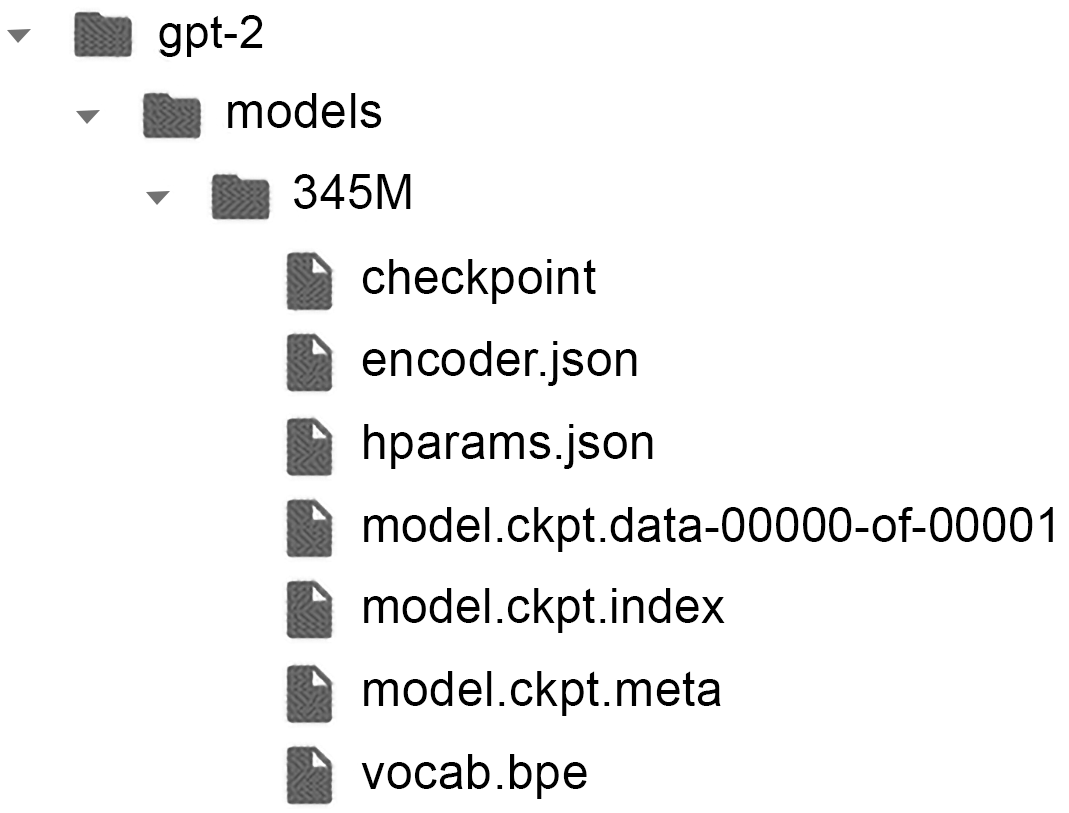

In [9]:
Image('https://github.com/Denis2054/Transformers-for-NLP-2nd-Edition/raw/main/Notebook%20images/AppIII/B17948_Appendix%20III_04.PNG', width=500) #This is used for rendering images in the notebook

#Steps 6 - 7: Intermediate instructions

In [10]:
#@title Step 6: Printing UTF encoded text to the console
!export PYTHONIOENCODING=UTF-8

In [12]:
#@title Step 7: Project Source Code
import os # import after runtime is restarted
os.chdir("/content/gpt-2/src")

In [19]:
#@title Step 7a: Interactive Conditional Samples (src)
#Project Source Code for Interactive Conditional Samples:
# /content/gpt-2/src/interactive_conditional_samples.py file 
import json
import os
import numpy as np
#import tensorflow as tf
import tensorflow.compat.v1 as tf #March 2023 update

#Steps 7b - 8: Importing and defining the model

In [20]:
#@title Step 7b: Importing model sample encoder
import model, sample, encoder
#if following message:
#ModuleNotFoundError: No module named 'tensorflow.contrib'
#then go back and run Step 2 Checking TensorFlow version 

In [21]:
#@title Step 8: Defining the model
def interact_model(
    model_name,
    seed,
    nsamples,
    batch_size,
    length,
    temperature,
    top_k,
    models_dir
):
    models_dir = os.path.expanduser(os.path.expandvars(models_dir))
    if batch_size is None:
        batch_size = 1
    assert nsamples % batch_size == 0

    enc = encoder.get_encoder(model_name, models_dir)
    hparams = model.default_hparams()
    with open(os.path.join(models_dir, model_name, 'hparams.json')) as f:
        hparams.override_from_dict(json.load(f))

    if length is None:
        length = hparams.n_ctx // 2
    elif length > hparams.n_ctx:
        raise ValueError("Can't get samples longer than window size: %s" % hparams.n_ctx)

    with tf.Session(graph=tf.Graph()) as sess:
        context = tf.placeholder(tf.int32, [batch_size, None])
        np.random.seed(seed)
        tf.set_random_seed(seed)
        output = sample.sample_sequence(
            hparams=hparams, length=length,
            context=context,
            batch_size=batch_size,
            temperature=temperature, top_k=top_k
        )

        saver = tf.train.Saver()
        ckpt = tf.train.latest_checkpoint(os.path.join(models_dir, model_name))
        saver.restore(sess, ckpt)

        while True:
            raw_text = input("Model prompt >>> ")
            while not raw_text:
                print('Prompt should not be empty!')
                raw_text = input("Model prompt >>> ")
            context_tokens = enc.encode(raw_text)
            generated = 0
            for _ in range(nsamples // batch_size):
                out = sess.run(output, feed_dict={
                    context: [context_tokens for _ in range(batch_size)]
                })[:, len(context_tokens):]
                for i in range(batch_size):
                    generated += 1
                    text = enc.decode(out[i])
                    print("=" * 40 + " SAMPLE " + str(generated) + " " + "=" * 40)
                    print(text)
            print("=" * 80)

Step 9: Interacting with GPT-2

In [22]:
#@title Step 9: Interacting with GPT-2 
interact_model('345M',None,1,1,300,1,0,'/content/gpt-2/models')

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use `tf.random.categorical` instead.


Model prompt >>> What is the capital of France?
======================================== SAMPLE 1 ========================================
 It's basically not anywhere in particular. There are no large cities, there is no origin. France is quite a long way from its major center and its geographical center, but one finds plenty of real trade pearls and we rapidly increase our production of pearl confections." No country seems to make this point over and over, it's as if they happen to be unaware of the ugly fact that magic doesn't exist in their pretty spots. The real problem is that neither France nor outside Europe escapes from its struggle with poverty and makes some grand claim to being the rightful owners of their area. Thirty-two million points of circumstance must be henceforth separated.


[The truth is that regardless of whether a financial bubble would equal the financial losses to the other countries taking a a hard throw at the Isle of Man or not there is in fact no way of d

KeyboardInterrupt: ignored